**Objective**
Hospital want to understand the patient characteristics associated with heartattack risk to improve preventative measures.

**Data Overview** Dataset has patient related data and factors like age,gender,heart rate,bp which contribute to heart attack risk in the patients. it also has CKMB and Tropnin which are blood markers which can detect the heart damage. its level will increase if the heart is damage.

In [44]:
import pandas as pd
import numpy as np

**Data Reading**

In [45]:
df=pd.read_csv("Medicaldataset.csv")

In [46]:
#shape of the dataset
df.shape

(1319, 9)

In [47]:
# Datatype of each column in dataframe
df.dtypes

,0
Age,int64
Gender,int64
Heart rate,int64
Systolic blood pressure,int64
Diastolic blood pressure,int64
Blood sugar,float64
CK-MB,float64
Troponin,float64
Result,object


**Data Cleaning**


In [48]:

# Missing value detection
df.isna().sum()

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0


#There is no need to deal with data missing as there is no missing data.

In [49]:
#Find % of null values in datasets
print(df.isna().sum()/len(df)*100, '\n')

Age                         0.0
Gender                      0.0
Heart rate                  0.0
Systolic blood pressure     0.0
Diastolic blood pressure    0.0
Blood sugar                 0.0
CK-MB                       0.0
Troponin                    0.0
Result                      0.0
dtype: float64 



In [50]:
#find all the symbol or character in the dataset which should not be part of the column, find for all columns

import string

# Function to find non-standard characters in a column
def find_non_standard_chars(df, column):
    # Define allowed characters (letters, numbers, whitespace, common punctuation)
    allowed_chars = string.ascii_letters + string.digits + string.whitespace + string.punctuation

    # Initialize a set to store unique non-standard characters
    non_standard_chars = set()

    # Iterate through each value in the column
    for value in df[column].dropna(): # Use dropna to skip NaN values
        # Convert value to string (handle potential non-string data types)
        value_str = str(value)
        # Check each character in the string
        for char in value_str:
            if char not in allowed_chars:
                non_standard_chars.add(char)
    return non_standard_chars

# Iterate through all columns in the DataFrame
for col in df.columns:
    non_standard_chars_in_col = find_non_standard_chars(df, col)
    if non_standard_chars_in_col:
        print(f"Non-standard characters found in column '{col}': {non_standard_chars_in_col}")
    else:
        print(f"No non-standard characters found in column '{col}' (or column is empty/contains only standard chars).")

No non-standard characters found in column 'Age' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Gender' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Heart rate' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Systolic blood pressure' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Diastolic blood pressure' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Blood sugar' (or column is empty/contains only standard chars).
No non-standard characters found in column 'CK-MB' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Troponin' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Result' (or column is empty/contains only standard chars).


**Outlier Detection and Handeling**

In [51]:
print("--- Outlier Detection and Handling ---")

# Get all numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Find outliers
    outliers_lower = df[col] < lower
    outliers_upper = df[col] > upper
    total_outliers = outliers_lower.sum() + outliers_upper.sum()

    if total_outliers > 0:
        print(f"\nColumn: {col}")
        print(f"  Outliers detected: {total_outliers}")
        print(f"  Replacing values below {lower:.2f} with {lower:.2f}")
        print(f"  Replacing values above {upper:.2f} with {upper:.2f}")

        # Replace lower outliers with lower bound
        df.loc[outliers_lower, col] = lower
        # Replace upper outliers with upper bound
        df.loc[outliers_upper, col] = upper
    else:
        print(f"\nColumn: {col}")
        print("  No outliers detected.")

# Show a quick look at the cleaned DataFrame
print("\nDataFrame after handling outliers:")
print(df.head())


--- Outlier Detection and Handling ---

Column: Age
  Outliers detected: 7
  Replacing values below 20.00 with 20.00
  Replacing values above 92.00 with 92.00

Column: Gender
  No outliers detected.

Column: Heart rate
  Outliers detected: 30
  Replacing values below 32.50 with 32.50
  Replacing values above 116.50 with 116.50

Column: Systolic blood pressure
  Outliers detected: 32
  Replacing values below 60.50 with 60.50
  Replacing values above 192.50 with 192.50

Column: Diastolic blood pressure
  Outliers detected: 12
  Replacing values below 33.50 with 33.50
  Replacing values above 109.50 with 109.50

Column: Blood sugar
  Outliers detected: 92
  Replacing values below -9.25 with -9.25
  Replacing values above 276.75 with 276.75

Column: CK-MB
  Outliers detected: 205
  Replacing values below -4.57 with -4.57
  Replacing values above 12.03 with 12.03

Column: Troponin
  Outliers detected: 257
  Replacing values below -0.11 with -0.11
  Replacing values above 0.20 with 0.20

Dat

<ipython-input-51-894b597b46e5>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers_lower, col] = lower
<ipython-input-51-894b597b46e5>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '60.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers_lower, col] = lower
<ipython-input-51-894b597b46e5>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers_lower, col] = lower


**Exploratory Data Analysis**

Descriptive Analysis

In [52]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66.0,160.0,83.0,160.00,1.80,0.01200,negative
1,21,1,94.0,98.0,46.0,276.75,6.75,0.20475,positive
2,55,1,64.0,160.0,77.0,270.00,1.99,0.00300,negative
3,64,1,70.0,120.0,55.0,270.00,12.03,0.12200,positive
4,55,1,64.0,112.0,65.0,276.75,1.08,0.00300,negative


In [53]:
df.groupby('Result')['Age'].describe()
df.groupby('Result').mean()


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
Result,,,,,,,,
negative,52.108055,0.603143,75.887033,127.584479,72.385069,143.283792,2.555344,0.007309
positive,58.732099,0.695062,75.959877,126.353704,72.060494,139.971914,5.662505,0.090746


Here CKMB levels are high for the positive patience , this can be a positive factor to predict the heart attack. Positive patient has 23.2 CKMB and Tropnin has 0.57 which high value. patient with CK MB with greater than 23.2 has high chances of heart attack.

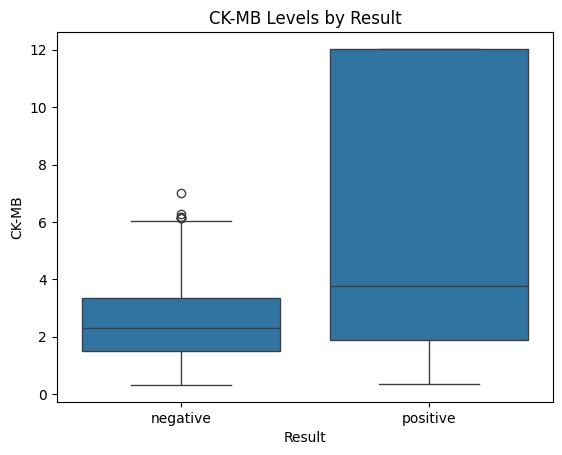

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of CK-MB levels by Result
sns.boxplot(x='Result', y='CK-MB', data=df)

# Optional formatting
plt.title('CK-MB Levels by Result')
plt.xlabel('Result')
plt.ylabel('CK-MB')
plt.show()


Clear difference in CK-MB levels between negative and positive result groups.

The positive group has significantly higher CK-MB values on average and much more variability.

The presence of many extreme outliers suggests that CK-MB could be a strong indicator or biomarker linked to the positive result condition (e.g., myocardial damage, if this is cardiac data).

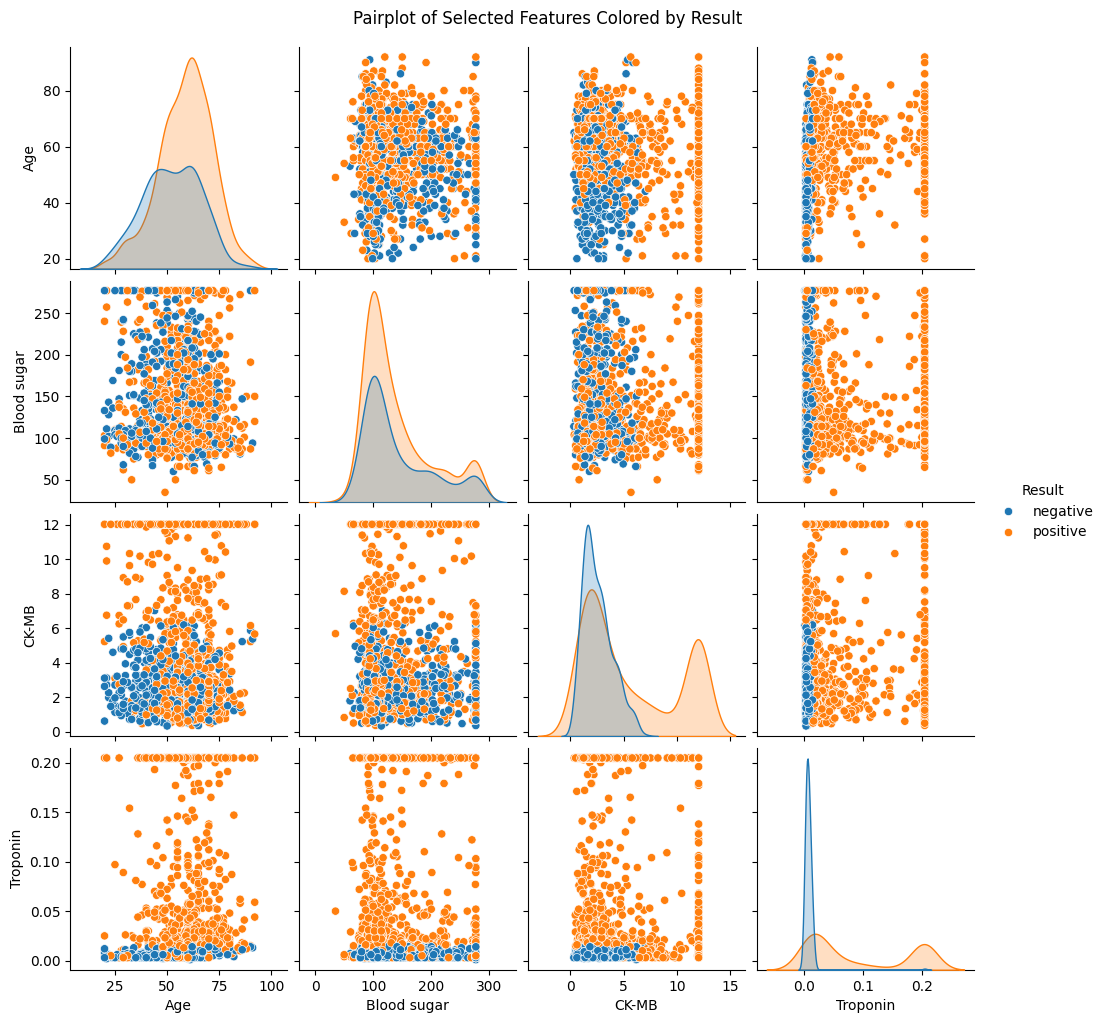

In [55]:

# Select variables of interest
features = ['Age', 'Blood sugar', 'CK-MB', 'Troponin', 'Result']

# Generate pairplot
sns.pairplot(data=df[features], hue='Result', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features Colored by Result', y=1.02)
plt.show()


1.CK-MB and Troponin clearly distinguish between positive and negative cases
For both CK-MB and Troponin, positive cases (orange) dominate the higher value range.

These two features show a strong potential as biomarkers for predicting positive outcomes.

2.CK-MB and Troponin are clustered low for negatives, but spread wide for positives.
3.CK-MB and Troponin are excellent discriminators between positive and negative results
4. Blood Sugar shows weak separation
Blood sugar levels have large overlap between positive and negative cases.Slight tendency of higher values among positives, but not distinct.
5.Blood sugar alone may not be a strong predictor of result.

6. Age has overlapping distribution
There's a slight shift in distribution: positive cases are slightly more frequent in older ages.But still, there's considerable overlap, and young individuals also show positive results.
7.Age contributes some signal but is not a strong standalone predictor.
8.Plot shows some positive relationship: when CK-MB is high, Troponin tends to be high as well (especially for positive cases).

Outlier Detection and Handeling

**Questions to Answer**

In [17]:
#Questions to Answers
#1. what percentage of people has heart attack risk?
#2.how this risk is distributed in male and female?
#3.what is the age group which most patient are falling for heart attack?
#4.what is the avg heart rate,bp,blood suger for positive patient
#5. what is avg CKMB and troponin for positive patient?

In [18]:
#1. what percentage of people has heart attack risk?
result_count=df["Result"].value_counts()
overall=result_count.sum()

positive_percentage = (result_count["positive"] / overall) * 100
negative_percentage = (result_count["negative"] / overall) * 100

print(f"Percentage of positive results: {positive_percentage:.2f}%")
print(f"Percentage of negative results: {negative_percentage:.2f}%")

Percentage of positive results: 61.41%
Percentage of negative results: 38.59%


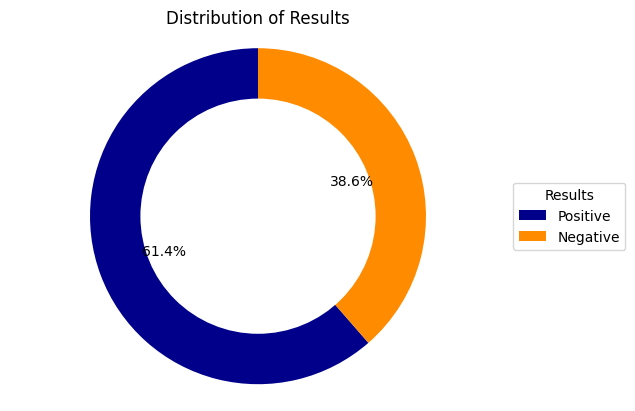

In [19]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
colors = ['darkblue', 'darkorange']

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, colors=colors, autopct='%1.1f%%',
                                   startangle=90)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Results')
plt.legend(wedges, labels,
           title="Results",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Percentage of gender in positive cases:
Gender
1    69.506173
0    30.493827
Name: count, dtype: float64


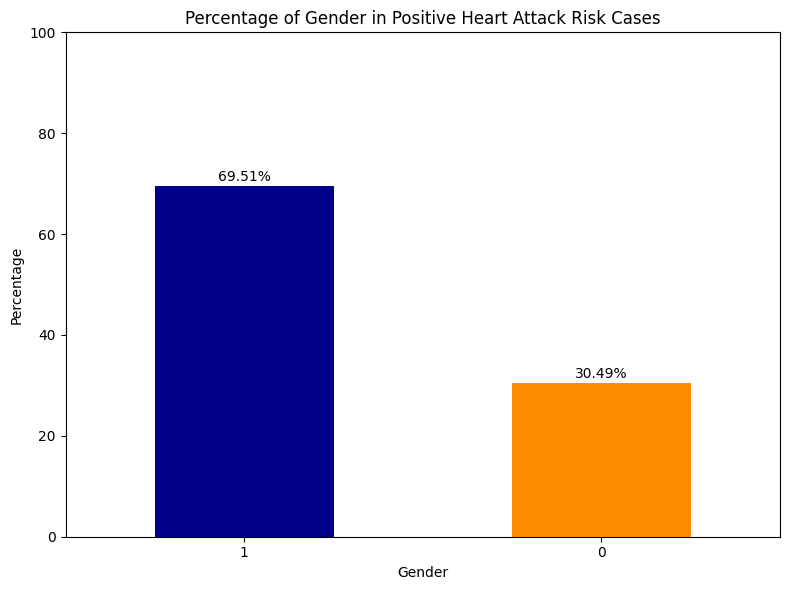

In [20]:
#2.how this risk is distributed in male and female?
# prompt: find percentage of gender in positive_number with visualization
#Assumed here 1 = Male and 0 = Female in the dataset for gender column

# Filter the DataFrame to include only rows where 'Result' is 'positive'
positive_df = df[df['Result'] == 'positive']

# Get the value counts for the 'sex' column within the positive cases
gender_distribution_positive = positive_df['Gender'].value_counts()

# Calculate the percentage distribution
gender_percentage_positive = (gender_distribution_positive / gender_distribution_positive.sum()) * 100

print("Percentage of gender in positive cases:")
print(gender_percentage_positive)

# Create the visualization
plt.figure(figsize=(8, 6))
gender_percentage_positive.plot(kind='bar', color=['darkblue', 'darkorange'])
plt.title('Percentage of Gender in Positive Heart Attack Risk Cases')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.ylim(0, 100) # Set y-axis limit to 0-100%

# Add the percentage values on top of the bars
for i, percentage in enumerate(gender_percentage_positive):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.tight_layout()
plt.show()


**Feature Engineering**

**Modelling**

**Key insights**

**Recommendation**

**Data Dictionary**